# Results.ipynb

Investigate results from the runTests notebook

To run this, first open `runTests.ipynb` and execute all the cells, it will store the results in global space.  Then, run the below to pull them here.

In [18]:
%store -r results

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

In [20]:
# Load the results one of the few ways
# %store -r results

numRecords = 400000
# numRecords = 1500000
with open(f"results_{numRecords}.pkl", "rb") as file:
    results = pkl.load(file)

In [21]:
pdResults = pd.DataFrame.from_dict(results)
pdResults["Time (s)"] = pdResults["Time (s)"].astype(float)
pdResults

,Test,Description,Time (s),Category
0,Test 1,"One-Column, integer, Clustered Index Create",3.5087,Cluster Add
1,Test 2,"One-Column, integer, Clustered Index Delete",0.0433,Cluster Drop
2,Test 3,"One-Column, integer, Clustered Index Create - ...",24.1526,Cluster Add
3,Test 4,"One-Column, integer, Clustered Index Delete - ...",0.3262,Cluster Drop
4,Test 5,"Two-Column, Clustered Index Create",17.0948,Cluster Add
5,Test 6,"Two-Column, Clustered Index Delete",0.1060,Cluster Drop
6,Test 7,"Two-Column, Clustered Index Create - Extra Rec...",35.5480,Cluster Add
7,Test 8,"Two-Column, Clustered Index Delete - Extra Rec...",0.2372,Cluster Drop
8,Test 9,"Single-Column, Non-Clustered Index Create",2.0055,Non-Cluster Add
9,Test 10,"Single-Column, Non-Clustered Index Delete",0.0140,Non-Cluster Delete


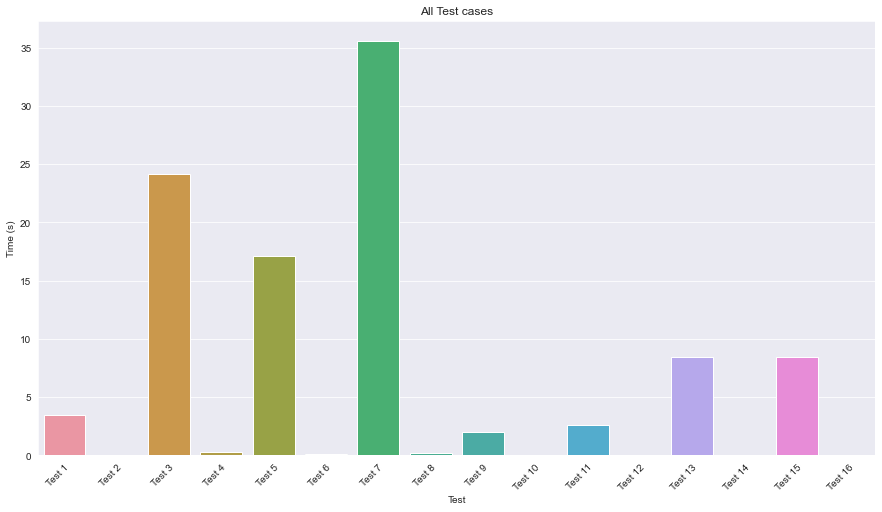

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=pdResults, x="Test", y="Time (s)", ax=ax).set(title='All Test cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show()

In [34]:
clusteredTests = pdResults[(pdResults["Category"] == "Cluster Add") | (pdResults["Category"] == "Cluster Drop")]
clusteredTests

,Test,Description,Time (s),Category
0,Test 1,"One-Column, integer, Clustered Index Create",3.5087,Cluster Add
1,Test 2,"One-Column, integer, Clustered Index Delete",0.0433,Cluster Drop
2,Test 3,"One-Column, integer, Clustered Index Create - ...",24.1526,Cluster Add
3,Test 4,"One-Column, integer, Clustered Index Delete - ...",0.3262,Cluster Drop
4,Test 5,"Two-Column, Clustered Index Create",17.0948,Cluster Add
5,Test 6,"Two-Column, Clustered Index Delete",0.1060,Cluster Drop
6,Test 7,"Two-Column, Clustered Index Create - Extra Rec...",35.5480,Cluster Add
7,Test 8,"Two-Column, Clustered Index Delete - Extra Rec...",0.2372,Cluster Drop


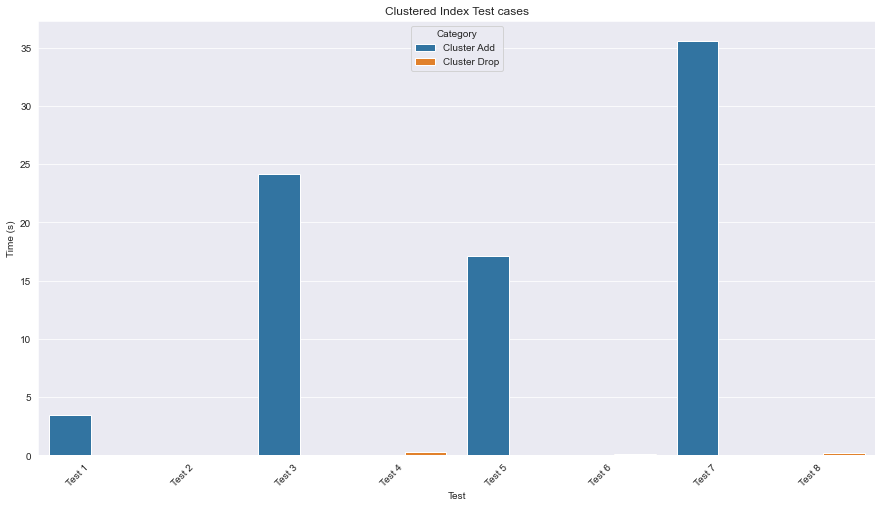

In [35]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=clusteredTests, x="Test", y="Time (s)", hue="Category", ax=ax).set(title='Clustered Index Test cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [36]:
nonClusteredTests = pdResults[(pdResults["Category"] == "Non-Cluster Add") | (pdResults["Category"] == "Non-Cluster Drop")]
nonClusteredTests

,Test,Description,Time (s),Category
8,Test 9,"Single-Column, Non-Clustered Index Create",2.0055,Non-Cluster Add
10,Test 11,"Single-Column, Non-Clustered Index Create - Ex...",2.6225,Non-Cluster Add
12,Test 13,"Dual-Column, Non-Clustered Index Create",8.4638,Non-Cluster Add
14,Test 15,"Dual-Column, Non-Clustered Index Create - Extr...",8.4683,Non-Cluster Add


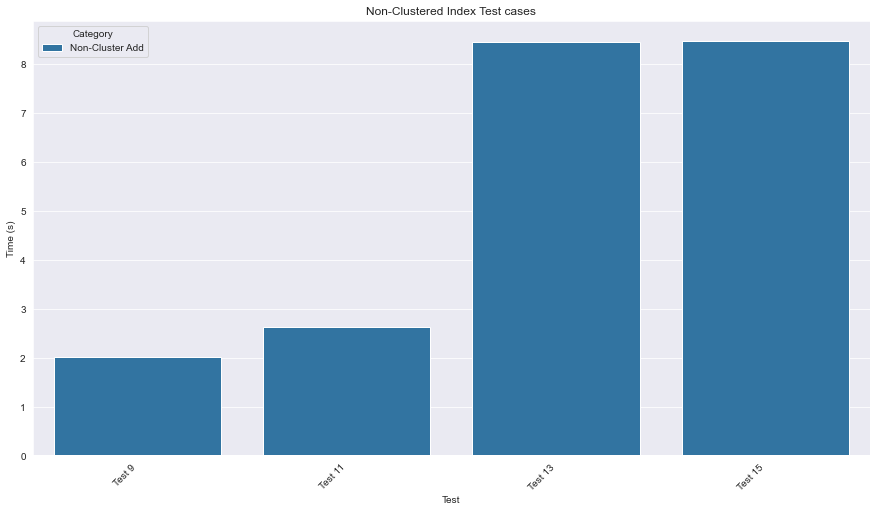

In [37]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=nonClusteredTests, x="Test", y="Time (s)", hue="Category", ax=ax).set(title='Non-Clustered Index Test cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()